In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.externals import joblib

%matplotlib inline
np.random.seed(42)

In [9]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v3/train_df_pca.csv")
test_df = pd.read_csv("~/real_estate/data/v3/test_df_pca.csv")

# Split daga
features = train_df.columns[:-1]

X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df["target"].values
y_test = test_df["target"].values

In [10]:
svr = SVR()
svr.fit(X_train, y_train)

/home/gnazareths/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_train_hat = pd.DataFrame(svr.predict(X_train), columns=["target"])
y_test_hat = pd.DataFrame(svr.predict(X_test), columns=["target"])

In [12]:
errors_train = abs(y_train - y_train_hat["target"].values)
errors_test = abs(y_test - y_test_hat["target"].values)

In [13]:
print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test_hat["target"].values, y_test)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train_hat["target"].values, y_train)[0,1]))

Mean test error:  0.04477419464973707
Mean test value:  0.07929045117451608
R^2 test:  0.2164020506236397
---
Mean train error:  0.04415723929132736
Mean train value:  0.08054816873147967
R^2 train:  0.44658737127388975


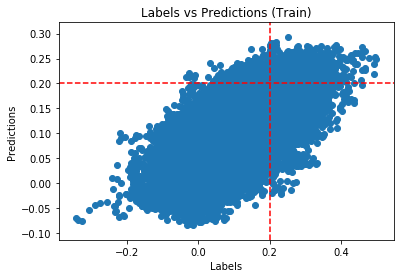

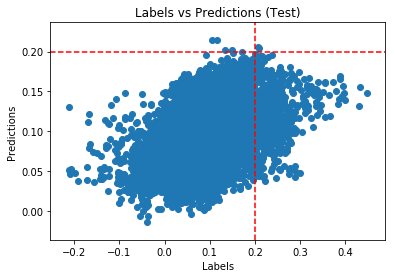

In [16]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (Train)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.2, color="red", linestyle='--')
plt.axhline(y=0.2, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Test)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.2, color="red", linestyle='--')
plt.axhline(y=0.2, color="r", linestyle='--')
plt.show()